C:\Users\User\AppData\Local\Temp\ipykernel_7668\4265701451.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('C:/Users/User/Desktop/10/rossmann-store-sales/train.csv')


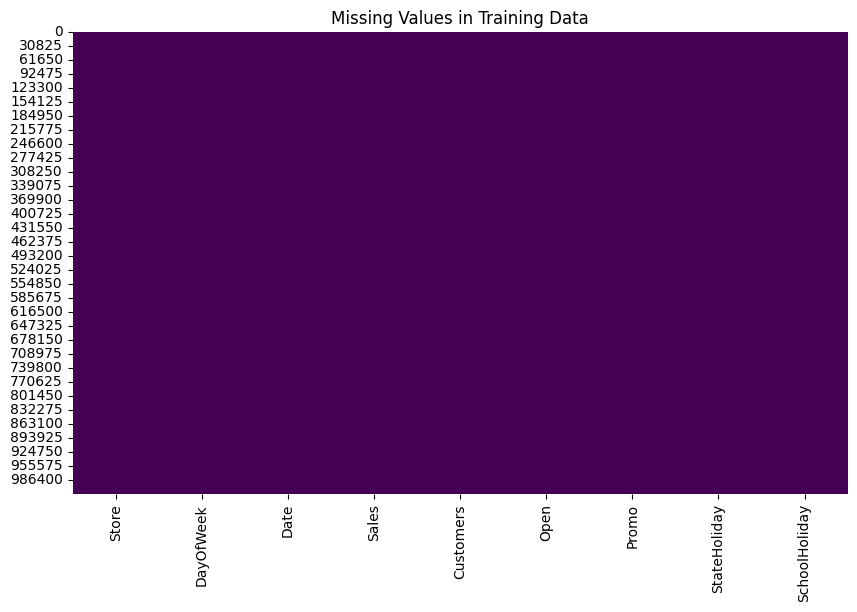

In [1]:
import pandas as pd

# Load the dataset
train_data = pd.read_csv('C:/Users/User/Desktop/10/rossmann-store-sales/train.csv')
test_data = pd.read_csv('C:/Users/User/Desktop/10/rossmann-store-sales/test.csv')

# Check for missing values
missing_train = train_data.isnull().sum()
missing_test = test_data.isnull().sum()

# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Training Data')
plt.show()
